In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
train_df = pd.read_csv('/content/drive/My Drive/fraudTrain.csv')
test_df = pd.read_csv('/content/drive/MyDrive/fraudTest.csv')


In [11]:
drop_cols = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'unix_time', 'merchant',
             'trans_num', 'job', 'city', 'first', 'last', 'street', 'dob']
train_df.drop(columns=drop_cols, inplace=True, errors='ignore')
test_df.drop(columns=drop_cols, inplace=True, errors='ignore')


In [12]:
label_cols = ['gender', 'category', 'state']
le = LabelEncoder()
for col in label_cols:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])


In [13]:
X_train = train_df.drop("is_fraud", axis=1)
y_train = train_df["is_fraud"]
X_test = test_df.drop("is_fraud", axis=1)
y_test = test_df["is_fraud"]


In [14]:
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)


In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
}



==== Logistic Regression ====
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.05      0.77      0.09      2145

    accuracy                           0.94    555719
   macro avg       0.52      0.85      0.53    555719
weighted avg       1.00      0.94      0.97    555719



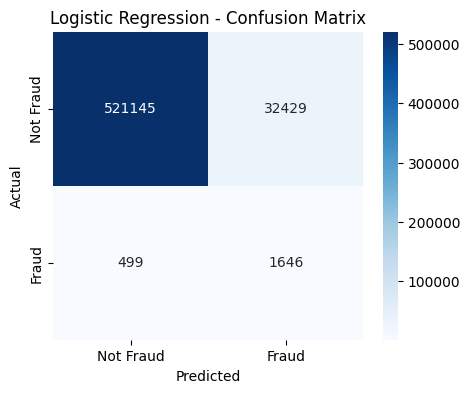


==== Decision Tree ====
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.08      0.90      0.15      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.93      0.56    555719
weighted avg       1.00      0.96      0.98    555719



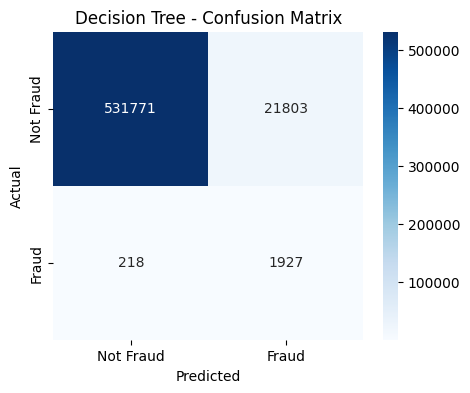


==== Random Forest ====
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.13      0.82      0.22      2145

    accuracy                           0.98    555719
   macro avg       0.56      0.90      0.60    555719
weighted avg       1.00      0.98      0.99    555719



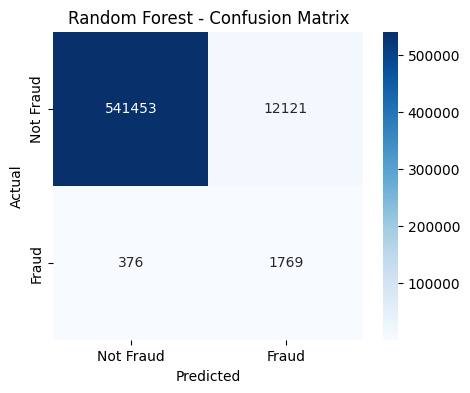

In [16]:
for name, model in models.items():
    print(f"\n==== {name} ====")
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
